# Capstone 2

### Background

The National Oceanic and Atmospheric Administration (NOAA) has been monitoring global atmospheric abundances of greenhouse gases all over the world. Greenhouse gases contribute to the greenhouse effect by absorbing infrared radiation, hence increasing atmospheric temperature. The air samples have been collected through a global air sampling network from over 80 sites. Since 1979, the NOAA has been measuring "radiative forcing" also known as climate forcing, or the changes in climate that cause warming due to greenhouse gases. The Intergovernmental Panel on Climate Change (IPCC) defines climate forcing as "an externally imposed perturbation in the radiative energy budget of the Earth climate system, e.g. through changes in solar radiation, changes in the Earth albedo, or changes in atmospheric gases and aerosol particles”. Thus climate forcing is a “change” in the status quo.  

### Data

The data being used for this analysis and reearch propoasal is from the Earth System Research Laboratory Global Monitoring Division. The data contains the The NOAA Annual Greenhouse Gas Index (AGGI), Global Radiative Forcing and CO2-equivalent mixing ratio. This data set was chosen to bring awareness to climate change and to be able to shine light on possibilities of reducing greenhouse gas emissions. 



In [1095]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [1096]:
df=pd.read_csv('noaa_aggi_forcing.csv')

In [1097]:
df.head() 

,Year,CO2,CH4,N2O,CFC12,CFC11,15-minor,Total,CO2-eq (ppm) Total,AGGI 1990 = 1,AGGI % change *
0,1979,1.027,0.406,0.104,0.092,0.039,0.031,1.699,382.0,0.785,NaN
1,1980,1.058,0.413,0.104,0.097,0.042,0.034,1.747,385.0,0.807,2.2
2,1981,1.077,0.420,0.107,0.102,0.044,0.036,1.786,388.0,0.825,1.8
3,1982,1.089,0.426,0.111,0.107,0.046,0.038,1.818,390.0,0.840,1.5
4,1983,1.115,0.429,0.113,0.113,0.048,0.041,1.859,394.0,0.859,1.9


### Values in Data

1. CO2: Carbon Dioxide
2. CH4: Methane
3. N2O: Nitrogen Oxide
4. CFC12: Chlorofluorocarbons 12
5. CFC11: Chlorofluorocarbons 11
6. 15-minor: Halogenated gases, other greenhouse gases
7. Total: Total of gases from CO2 to 15-minor
8. CO2-eq Total: The amount of CO2 that would have equivalent global warming impact. Expresses the impact of each    different greenhouse gas in terms of the amount of CO2 that would create the same amount of warming.
9. AGGI 1990=1: Annual greenhouse gas index. The ratio of the total direct radiative forcing due to long-lived greenhouse gases for any year for which adequate global measurements exist to that which was present in 1990. 1990 was the beginning of Kyoto Protocol. An initiative to reduce AGGI.  
10. AGGI % change = Percentage change from previous year. 

In [1098]:
#renaming for readability
df.rename(columns={'15-minor': 'Other_gases', 'CO2-eq (ppm) Total': 'CO2eq_Total', 
                   'AGGI 1990 = 1': 'AGGI', 'AGGI % change': 'AGGI_percent_change'}, inplace=True)

In [1099]:
df.describe()

,CO2,CH4,N2O,CFC12,CFC11,Other_gases,Total,CO2eq_Total,AGGI,AGGI % change *
count,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000,36.000000
mean,1.458108,0.466676,0.144351,0.154054,0.059946,0.076676,2.359892,433.162162,1.090081,1.644444
std,0.271078,0.025723,0.025388,0.025529,0.007764,0.025266,0.370735,29.881724,0.171219,0.387257
min,1.027000,0.406000,0.104000,0.092000,0.039000,0.031000,1.699000,382.000000,0.785000,0.700000
25%,1.250000,0.451000,0.122000,0.143000,0.058000,0.057000,2.085000,411.000000,0.963000,1.400000
50%,1.426000,0.474000,0.142000,0.167000,0.062000,0.079000,2.359000,432.000000,1.090000,1.600000
75%,1.685000,0.483000,0.165000,0.172000,0.066000,0.095000,2.662000,457.000000,1.229000,1.900000
max,1.939000,0.504000,0.190000,0.174000,0.068000,0.118000,2.974000,485.000000,1.374000,2.800000


In [1100]:
df.drop(df.tail(2).index,inplace=True)
df.tail()
#cleaning the NaN row

,Year,CO2,CH4,N2O,CFC12,CFC11,Other_gases,Total,CO2eq_Total,AGGI,AGGI % change *
32,2011,1.817,0.492,0.178,0.169,0.060,0.109,2.825,471.0,1.305,1.5
33,2012,1.845,0.494,0.181,0.168,0.059,0.111,2.858,474.0,1.320,1.5
34,2013,1.882,0.496,0.184,0.167,0.059,0.114,2.901,478.0,1.340,2.0
35,2014,1.908,0.499,0.187,0.166,0.058,0.116,2.935,481.0,1.356,1.6
36,2015,1.939,0.504,0.190,0.165,0.058,0.118,2.974,485.0,1.374,1.8


In [1101]:
df.fillna(df.mean(),inplace=True)
df.head()
#replaced NaN with mean

,Year,CO2,CH4,N2O,CFC12,CFC11,Other_gases,Total,CO2eq_Total,AGGI,AGGI % change *
0,1979,1.027,0.406,0.104,0.092,0.039,0.031,1.699,382.0,0.785,1.644444
1,1980,1.058,0.413,0.104,0.097,0.042,0.034,1.747,385.0,0.807,2.200000
2,1981,1.077,0.420,0.107,0.102,0.044,0.036,1.786,388.0,0.825,1.800000
3,1982,1.089,0.426,0.111,0.107,0.046,0.038,1.818,390.0,0.840,1.500000
4,1983,1.115,0.429,0.113,0.113,0.048,0.041,1.859,394.0,0.859,1.900000


In [1102]:
df.isnull().sum()
#Just making sure NaNs are gone

Year               0
CO2                0
CH4                0
N2O                0
CFC12              0
CFC11              0
Other_gases        0
Total              0
CO2eq_Total        0
AGGI               0
AGGI % change *    0
dtype: int64

Let's look at the trends of gases over time. 

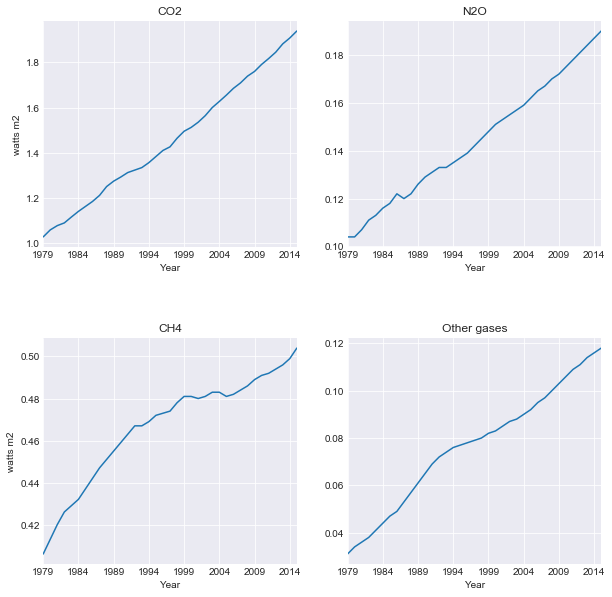

In [1103]:
fig = plt.figure(figsize=(10, 10))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(221)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

# Divide the figure into a 2x1 grid, and give me the second section
ax4 = fig.add_subplot(224)
df.plot(x='Year', y='CO2', ax=ax1, legend=False)
df.plot(x='Year', y='N2O', ax=ax2, legend=False)
df.plot(x='Year', y='CH4', ax=ax3, legend=False)
df.plot(x='Year', y='Other_gases', ax=ax4, legend=False)
plt.subplots_adjust(hspace = 0.4)
ax1.title.set_text('CO2')
ax2.title.set_text('N2O')
ax3.title.set_text('CH4')
ax4.title.set_text('Other gases')
ax1.set_ylabel('watts m2')
ax3.set_ylabel('watts m2')
plt.show()

Here we can see that the trends of the gases have been steadily increasing since 1979. 
Now let's explore other variables.

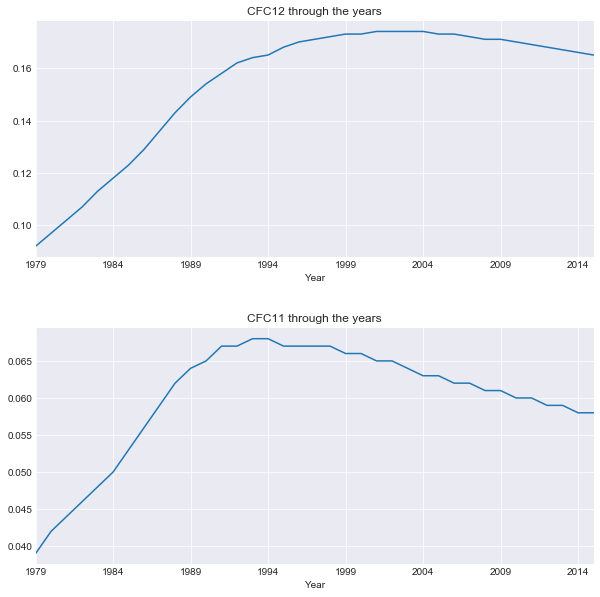

In [1104]:
fig = plt.figure(figsize=(10, 10))

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

df.plot(x='Year', y='CFC12', ax=ax1, legend=False)
df.plot(x='Year', y='CFC11', ax=ax2, legend=False)
plt.subplots_adjust(hspace = 0.3)
ax1.title.set_text('CFC12 through the years')
ax2.title.set_text('CFC11 through the years')
plt.show()

CFCs or chlorofluorcarbon have no natural source and are entirely man made, emitted from refrigerants and aerosol solvents. It was realized the they destroy the ozone and the production of CFCs were quickly halted, hence the declining trends in these plots. 

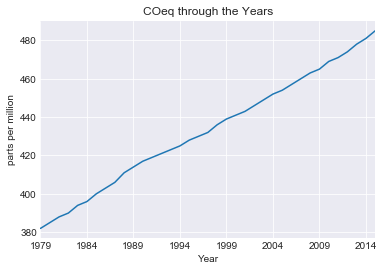

In 2015, 485.0 CO2eq was in the atmosphere


In [1105]:
#plotting CO2eq
df.plot(x='Year', y='CO2eq_Total',  legend=False)
plt.title('COeq through the Years')
plt.ylabel('parts per million')
plt.show()
maximum= df['CO2eq_Total'].max()
print('In 2015, {} CO2eq was in the atmosphere'.format(maximum))

Here we can see CO2eq trending up as well. CO2eq expresses the impact of each different greenhouse gas in terms of the amount of CO2 that would create the same amount of warming. The aggregate of greenhouse gases are trending up. 

In [1106]:
#calculate all of the pct_change from 1979 and 2015.
CO2change= df['CO2'].iloc[[0, -1]].pct_change()
N2Ochange=df['N2O'].iloc[[0, -1]].pct_change()
CH4change=df['CH4'].iloc[[0, -1]].pct_change()
CFC12change=df['CFC12'].iloc[[0, -1]].pct_change()
CFC11change=df['CFC11'].iloc[[0, -1]].pct_change()
Other_gases_change=df['Other_gases'].iloc[[0, -1]].pct_change()
CO2eq_Total_change=df['CO2eq_Total'].iloc[[0, -1]].pct_change()
AGGI_change= df['AGGI'].iloc[[0, -1]].pct_change()

In [1107]:
df1=pd.DataFrame({'CO2': CO2change, 'NO2': N2Ochange, 'CH4': CH4change, 'CFC12':CFC12change, 'CFC11':CFC11change,
                 'Other_gases': Other_gases_change, 'CO2eq':CO2eq_Total_change, 'AGGI':AGGI_change  })
df1.fillna((0),inplace=True)
df1.drop(df1.index[0], axis=0, inplace=True)
df1


,CO2,NO2,CH4,CFC12,CFC11,Other_gases,CO2eq,AGGI
36,0.888023,0.826923,0.241379,0.793478,0.487179,2.806452,0.269634,0.750318


 
Here we can see the percent changes for years 1979 and 2015. CO2 and NO2 have big changes, 88% and 82% respectively. Other gases have dramatically increased too, however, its amount in the atmosphere is not as much as CO2. The focus remains on reducing CO2 emissions.  

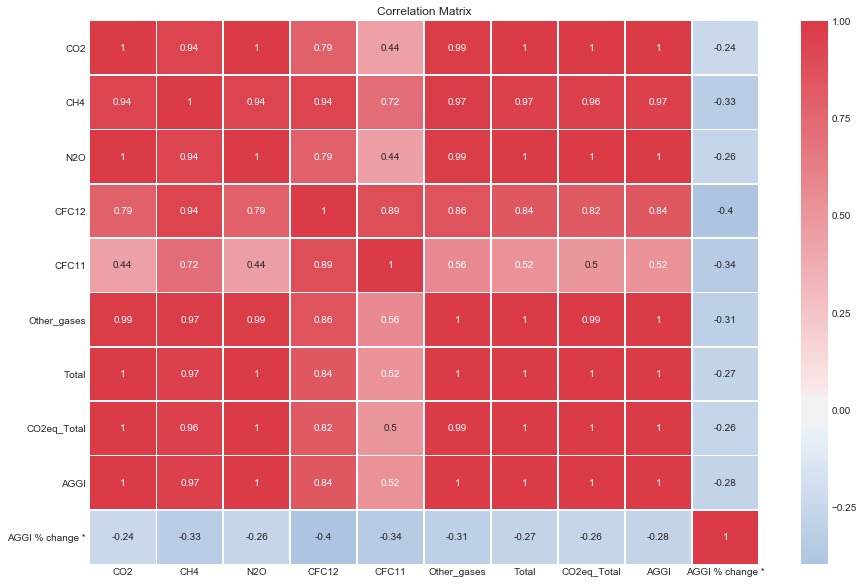

In [1108]:
corr2 = df.corr()
cmap = sns.diverging_palette(250, 10, as_cmap=True)
plt.figure(figsize=(15, 10))
sns.heatmap(corr2, cmap=cmap, vmax=1, center=0,
            linewidths=.5, annot=True)
plt.title("Correlation Matrix")
plt.show()
#Overall correlation of gases with each other.

# Experimental Hypothesis:

Based on our analysis of data, CO2 is one of the fastest growing greenhouse gas in the atmosphere that causes global warming. N2O, CH4 and other_gases, also remain a threat, but CO2 is potent, remains in the atmosphere for a long time, and the amount of CO2 in atmosphere poses a real threat. Because of this, we will focus on CO2 reduction. Though there are many ways to reduce CO2, change has to start from individuals and from local communities. We will focus our experiment on reduction of CO2 emissions in the household setting.


##### Our hypothesis will be: 
Families that are given subsidies and direction towards lowering carbon emissions will effectively reduce their carbon footprint by at least 50% in 6 months.

### The rollout.


We will recruit 200 families that have volunteered for the study. Families will have at least 2 members in their household in a suburban town in New York. Group A will consists of 100 families that will be randomly chosen to participate in the subsidized program and have access to guidance for carbon emission reductions. Group A will have an educator that specializes in ways to reduce CO2 emissions in the household. Group B families will consists of 100 families that participate in the study but will develop their own ways to cut down emissions. A pre-survey using the Environmental Protection Agency (EPA) CO2 emission calculator, will measure a month's worth of emissions for each of the 200 families prior to the start of the experiment. The EPA CO2 emission calculator looks at various sources of CO2 in the household settings and factors in the variables such as zip code and persons in household. It uses three different categories to calculate the CO2 emission at home.

Variables of CO2 calculator as follows. 
##### Home Energy
1.Sources of primary heating
    a. Natural Gas   
    b. Electricity  
    c. Fuel Oil  
    d. Propane 
    
2.Utility bills from source of energy in the home.

3.Calculates reduction of CO2 by making changes to lighting, use of washer dryer, power source and settings and use of Energy Star products or appliances. 

##### Transportation 
1.Current emissions from vehicles.

2.Maintenance of vehicles.

3.Calculates reduction of CO2 by performing regular maintenance checks on vehicles, reduce number of miles driven, and replace vehicle by better miles/gallon. 

##### Waste Reduction
1.Calculates emissions from waste.

2.Calculates reduction of waste from recylcing. 


The study will be conducted over the course of 6 months. At the end of each month, calculations will be made to measure the carbon emissions of the families using the same EPA calculator.  
 
 
### Evaluation:

After 6 months, we will compare the results of group A from group B. We will compare the pre and post calculations from the beginnning and the end of the experiment. To compare statisitical results, we will use the t-test. Statistical significance will be a p-value of <=0.05 for home energy, transportation and waste reduction and the total of CO2 cutback. We focus our main analysis on the amount of reduction of CO2 emissions by families that received the treatment vs. families that did not receive the treatment. Although CO2 reduction in the household is our main goal, other outcomes can possibly be measured through this experiment. First, we can look at the effect of a supervised intervention on a smaller scale, with the possibility of replication in other suburban areas in the US. We also want to understand the difficulties families go through while changing their lifestyles and old habits to decrease emissions. We can imagine it will be more difficult for the families that did not receive intervention to transition. Other than calculating emissions at the end of 6 months,we will also send a post-experiment survey. It will contain a 10 question survey such as rating their experiences on how easy or hard it was to transition to reduced CO2 living. A third outcome of measurement is to see if the families will continue the lifestyle, even after the experiment. A one year follow up will be made and a survey will be sent. It will ask the families what, if any, interventions they have continued and we will do a final assessment of their CO2 emissions using the same EPA calculator. 

### Limitations

It is important to note that this study is voluntary. Therefore, we may have a sample who are already conscious about their CO2 emissions, and they might already have smaller amounts of CO2 emissions compared to the overall U.S. population. It would be ideal to get data from a group of people that are mandated to reduce their CO2 emissions, which is a possibility in the future if human activity does not change and increases in CO2 is threatening. This experiment is also limited in a suburban setting. Cities will have different challenges and scenarios in reducing CO2, therefore, this experiment cannot be applied in a city setting.
### Conclusion

There is still much to learn about climate change. What we do know, based on the facts, is that the CO2 levels and other greenhouse gases continue to rise in the atmosphere, causing ozone depletion and global warming. We must do everything in our power to stop this, and it should start at home.